# Developing a Linear Regression Model for Property Valuation Data
### Jennifer Zhuang, Summer 2024
## Introduction
In this project, we aim to develop a robust linear regression model to predict property prices based on a set of property characteristics. The response variable of interest is the sale price of properties, while the regressors include attributes such as the number of rooms, property taxes, square footage, and other relevant features. We will employ a systematic approach to regression analysis, and the strategies we will use for variable selection and model building will closely follow the ones in our textbook (Montgomery et al., 2021, p. 367). 

The steps we will take are as follows:
1. Fit our entire model with all data & perform thorough analysis
2. Determine if a transformation of the response or regressors is necessary. Also, determine if there are possible outliers that need to be removed
4. Perform all possible regressions using criteria such as adjusted $R^2$, AIC & BIC, and PRESS statistic to rank the best subset models.
5. Compare and contrast the best models recommended by each criterion, performing a thorough analysis of the final model
6. Explore the need for further transformations.

The ultimate goal is to create an accurate and interpretable model that provides valuable insights into the key factors driving property prices.

## Defining Our Dataset
The dataset used in this analysis consists of our response variable, the sale price of homes, and various property attributes that serve as regressors in our model (Montgomery et al., 2021). Below is a description of each variable:

- **y**: Sale price of the house (in thousands of dollars)
- **x1**: Property taxes, including local, school, and county taxes (in thousands of dollars)
- **x2**: Number of bathrooms
- **x3**: Lot size (in thousands of square feet)
- **x4**: Living space (in thousands of square feet)
- **x5**: Number of garage stalls
- **x6**: Number of rooms
- **x7**: Number of bedrooms
- **x8**: Age of the home (in years)
- **x9**: Number of fireplaces

The specific data included in the dataset can be referenced in the accompanying Python code file under the same heading. Most of the variables are expected to have a positive influence on the sale price of a house, with the exception of the age of the home, which is generally expected to have a negative influence.

## Defining Our Model & Assumptions
We will begin by specifying the mathematical form of the relationship between the dependent variable (sale price) and the independent variables (property attributes). This model will serve as an approximation of the true relationship between the response and the regressors. We will begin with a multiple regression model that takes _all regressors and datapoints_ into consideration. We will improve upon this model later. 
$$y =\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_4+\beta_5x_5+\beta_6x_6+\beta_7x_7+\beta_8x_8+\beta_9x_9 + \epsilon$$
- The parameter $\beta_0$ is the intercept of the regression plane
- The parameters $\beta_i$ for $i = 1,2,..9$ indicate the expected change in the response $y$ per unit change in $x_i$ when all the remaining regressors $x_j$ where $i \neq j$ are held constant.
- $\epsilon$ is a random error component

The major assumptions of our model are as follows:
1. The relationship between the response $y$ and the regressors $x_i$ is linear.
2. The error term $\epsilon$ has zero mean.
3. The error term $\epsilon$ has constant variance $\sigma^2$.
4. The errors are uncorrelated.
5. The errors are normally distributed.

Once we fit our full model, we will conduct a comprehensive analysis, evaluating whether our assumptions hold true, whether transformations of the variables are necessary and which regressors should be included in the final model. 


### Estimating Our Model Parameters
The method of least squares can be used to estimate the regression coefficients. Below are the results from fitting our entire model. For detailed methodology and code implementation, please refer to the accompanying Python script (code block 4 & 5).
$$\hat{y} =14.9276+1.9247x_1+7.0005x_2+0.1492x_3+2.7228x_4+2.0067x_5-0.4101x_6-1.4032x_7-0.0371x_8+1.5594x_9$$

It is interesting to note is that there is a contradiction between the sign of our model coefficients and our intuition. We only expected regressor $x_8$, the age of a home, to have a negative influence on the sale price of a home, but regressors $x_6$ and $x_7$ have a negative sign as well. This may indicate multicollinearity is present or the range of our regressors is too small.
### Summary Statistics 

Below we perform an examination of the standard summary statistics.

#### Test for Significance of Regression

Once we have our fitted model, we want to test for significance of regression. This is a test that determines if there is a linear relationship between the response $y$ and any of the regressors $x_i$. It also serves as a global test of model adequacy. The hypotheses are as follows
* $H_0: \beta_0 = \beta_1 = ... = \beta_9 = 0$
* $H_1: \beta_i \neq 0 \text{, for at least one } i$

If the null hypothesis is true, our test statistic follows the $F_{\alpha, p-1, n-p}$ distribution where $p$ is the number of parameters in our model and $n$ is the number of observations in our dataset. We found the F-statistic to be $F_0 = 9.04$, which exceeds the critical value of $F_{0.05,9,15} = 2.65$ (code block 4 & 5). The corresponding p-value at an alpha level of $\alpha = 0.05$ is $p = 0.00019$, indicating a statistically significant result (code block 4 & 5). We can confidently reject the null hypothesis, concluding that there is at least one linear relationship between the response and a regressor. 

#### Tests on Individual Regression Coefficients

Further, we can test the significance of any individual regression coefficient $\beta_i$. The hypotheses for testing are
* $H_0: \beta_i = 0$
* $H_1: \beta_i \neq 0$

If the null hypothesis is not rejected, this indicates the corresponding regressor $x_i$ can potentially be deleted from the model. The test statistic we will employ follows a $t_{\alpha/2,n-p-1}$ distribution (which means our critical value is $t_{0.025,15}= 2.145$. Below are the results of our statistical testing (code block 4):

|    | T-Statistic | P-Value |
|--------------|-------------|---------|
| $\beta_0$  | 2.5246      | 0.0243  |
| $\beta_1$  | 1.8688      | 0.0827  |
| $\beta_2$  | 1.6279      | 0.1258  |
| $\beta_3$  | 0.3042      | 0.7654  |
| $\beta_4$  | 0.6246      | 0.5423  |
| $\beta_5$  | 1.4610      | 0.1661  |
| $\beta_6$  | -0.1724     | 1.1344  |
| $\beta_7$  | -0.4133     | 1.3143  |
| $\beta_8$  | -0.5568     | 1.4135  |
| $\beta_9$  | 0.8049      | 0.4343  |

After reviewing the significance of our regressors, several have p-values well above the typical significance level of 0.05. To improve our model, we can consider removing predictors that are not statistically significant and refitting the model. This could lead to a simpler model that is easier to interpret and may have better predictive performance.

#### Other Summary Statistics
Another statistic we can use to assess the overall adequacy of our model is the __adjusted coefficient of multiple determination__, $R_{adj}^2$. This statistic measures the what percent of the variance in the response variable can be explained by the regressors in the model. It also takes into consideration the number of regressors in the model. For our full model, the value is $R_{adj}^2 = 0.74$ (code block 4 & 5)

We can also use __Akaike Information Criterion__ (AIC) and __Bayesian Analogues__ (BICs). AIC is a measure used to compare the relative quality of statistical models for a given dataset. It balances the model's goodness of fit with its complexity, penalizing models with more parameters to prevent overfitting. BIC is similar to AIC but applies a stronger penalty for models with more parameters. We want both to be low values, indicating better models. For our full model the values are $\text{AIC} = 127.1$ and $\text{BIC} = 138.9$ (code block 4 & 5). These values will serve as baseline benchmarks for evaluating the effectiveness of any future transformations or adjustments to the model. 

Another value we can use to assess the adequacy of our model is the __PRESS Statistic__. The PRESS (Predicted Residual Sum of Squares) statistic shows how well a regression model predicts new data. It does this by testing the model on each data point. It exludes the data point from the model's training and then finds the squared difference between the predicted value and actual data point. A lower PRESS means the model predicts better. Our full model has a PRESS statistic of $\text{PRESS} = 393.49$ (code block 4 & 5). Once again, this serves as a baseline for future analysis, and we hope to improve upon it.

### Residual Analysis
We usually cannot detect departures from the underlying assumptions of our regression model from just examining the summary statistics and “global” model properties. This is important because violations of the assumptions may yield an unstable model and can cause inaccurate hypothesis testing and interval estimation. Below are several methods useful for diagnosing violations of the basic regression assumptions. 

#### Normal Probability Plot
A simple method of checking the normality assumption is to construct a normal probability plot of the residuals. This is a graphical tool designed to assess whether the residuals (the differences between observed and predicted values) are normally distributed. We sort our externally studentized residuals in increasing order and plot it against the cumulative normal distribution. The resulting points should lie approximately on a straight line.

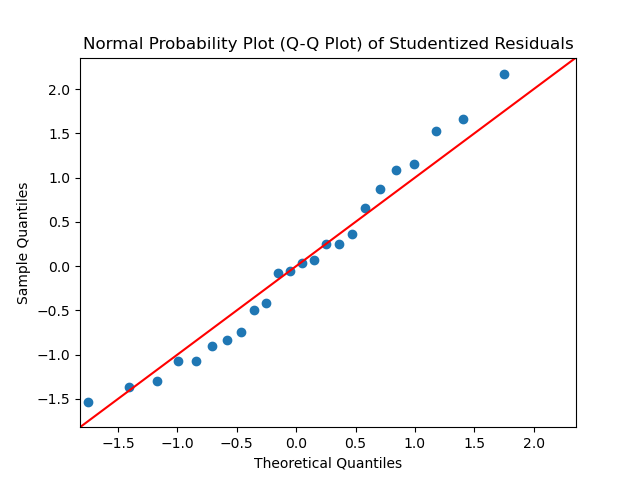

In [1]:
from IPython.display import Image
Image(filename='r_student_0.png', width=500, height=300)

The points at the extreme ends of the plot deviate slightly from the line. This suggests that the residuals may have slightly heavier tails than a normal distribution, indicating the presence of outliers or that the residuals are not normally distributed in the tails. Addressing these issues by checking for outliers, transforming the data, or revisiting the model specification could help improve the fit and the validity of our regression model.

Nonetheless, based on the current residual analysis, the assumption that the error term follows a normal distribution with a zero mean and constant variance appears to hold true.

#### Plot of Residuals against the Fitted Values

Next we plot our externally studentized residuals against its corresponding fitted value $\hat{y}_i$. Ideally, the residuals should display a random scatter around zero across all fitted values. Any discernible pattern, such as a funnel shape (indicative of heteroscedasticity) or a curve (suggesting non-linearity), would indicate that the model might be missing key elements or that assumptions like constant variance and linearity might be violated. We should also pay attention to any residuals that are far from zero, as these could be outliers or influential points that disproportionately affect the model's estimates.

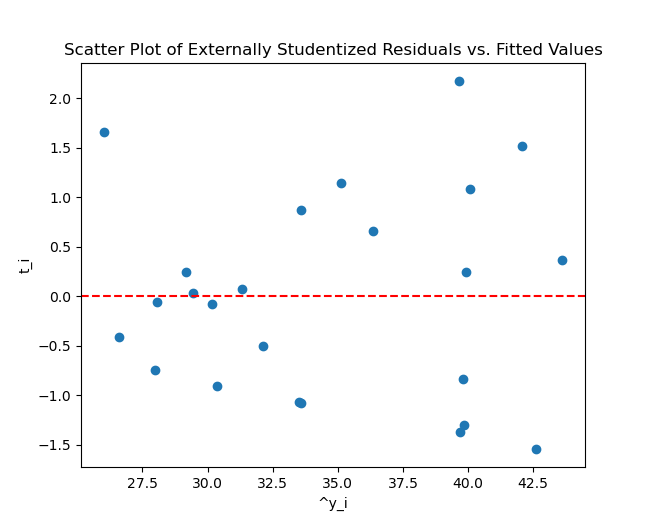

In [2]:
Image(filename='y_pred0_tvsy.png', width=500, height=300)

The residuals do appear somewhat randomly scattered and there doesn't seem to be a strong funnel shape or increasing spread. There are some points that are significantly above or below the 0 line, particularly around the fitted values of 40-42.5, which might be outliers or influential observations that could disproportionately affect the model. We can investigate further in the following sections. 

### Outliers and Treatment of Influential Points 
The next step in our analysis is to investigate influential points and potential outliers. Sometimes, a small number of data points can exert a disproportionate influence on the model's coefficients and overall characteristics. Identifying and addressing these points ensures the robustness and reliability of our model. We want our regression model to be representative of all of the observations, not just a few. Therefore, we will use Cook's Distance as a measure of influence. Cook's D assesses how much the predicted values and model coefficients would change if a particular data point were removed. 

Below we list the top 5 influential points, their corresponding Cook's Distance score, and the effect on our model adequacy if we remove the point & retrain our model (code block 11 & 12). 

|        Index =          | 17      | 22      | 7       | 14      | 16      |
|------------------|---------|---------|---------|---------|---------|
| __Cook's D__     | 0.1564  | 0.2103  | 0.2324  | 0.2827  | 0.3722  |
|__$R^2 _{adj}$ Score__  | 0.7738  | 0.7839  | 0.7573  | 0.7575  | 0.8011  |

Keeping in mind our original full model with all data points has a adjusted $R^2$ score of around 0.75, we can see that the impact of removing the datapoint at index 16 and 22 have pretty large effects on our model adequacy. Upon further inspection, the data point at index 22 is clearly an outlier. The Cook's D is high, and observed value for regressor $x_8$ is significantly different from the other datapoints. This strongly suggests that we should consider removing it from our analysis.  

### Multicollinearity
Next, we need to investigate the presence of multicollinearity, which refers to near-linear dependence among the regression variables. Multicollinearity can negatively impact the model by inflating the standard errors of the coefficients, leading to less reliable statistical inferences and making it difficult to assess the individual effect of each predictor. To detect multicollinearity, we will calculate the Variance Inflation Factor (VIF) for each regressor and examine the correlation matrix.

Below is a table that summarizes the VIF data for each regressor variable (implementation can be referenced in the accompanying Python code block 13):

|          | x1       | x2       | x3       | x4       | x5       | x6        | x7        | x8       | x9       |
|----------|----------|----------|----------|----------|----------|-----------|-----------|----------|----------|
| __VIF__      | 7.021036 | 2.835413 | 2.454907 | 3.836477 | 1.823605 | 11.710101 | 9.722663  | 2.320887 | 1.942494 |


A value above 5 suggests high multicollinearity, and we should consider removing or combining variables. Regressors $x_1, x_6, x_7$ need to be addressed. One way to do this is to examine the correlations between all of the regressors to detect near-linear dependence between pairs of regressors. Below is a heatmap of the correlation matrix. 

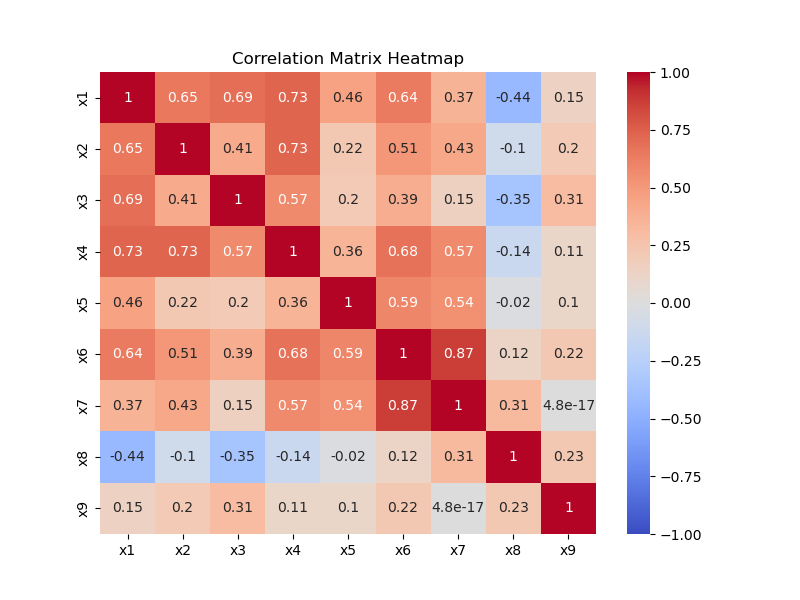

In [3]:
Image(filename='correlation_matrix_heatmap.png', width=500, height=500)

As we can see, multiple pairs of regressors have a high correlation coefficients. We can respecify our model using the methods below:
- Variable elimination is one option. If regressors are nearly linearly dependent, we can eliminate one regressor to combat multicollinearity.
- We can also redefine the regressors by combining them into one variable through a function. For instance, if $x_1, x_3, x_4$ are highly correlated we can create a new variable $x_{124}=x_1 *x_2*x_4$. That the information of the original regressors are preserved but ill conditioning is reduced.

For a more specific example, the regressors $x_6$ (number of rooms) and $x_7$ (number of bedrooms) appear to be highly correlated, leading to multicollinearity issues in our regression model. In the context of real estate, bedrooms are included in the total room count. This overlap in definition creates a positive correlation. To address this, we could create an new term $x_{67} = x_6*x_7$ that combines these two variables, capturing their joint effect and reducing potential collinearity. Or remove one of the regressors from the model entirely. We could also consider redefining regressors $x_1,x_4$ for the same reasons above. 

One thing to note, however, is that the correlation matrix above only takes into consider pairwise correlation (correlation between three or more variables is not accounted for). So to determine which interaction variables to include or what regressors to remove from our model, we perform variable selection below and take into consideration all combinations of interactions & variable eliminations. 

## All Possible Regressions
Now that we have confirmed the regression assumptions for our data hold true and applied the necessary data transformations, our next step is to identify the most appropriate subset of regressors from our large pool of possible candidates. To achieve this, we will employ the All Possible Regressors method. This method involves generating all possible combinations of the candidate regressors and fitting models for each combination. 

> _Note: We limit our analysis to include interaction variables of up to three variables. Including more variables results in over a trillion possible regressions, which would be computationally impossible to evaluate. As a possible future step, combining the all possible regressions method with other variable selection methods could help enhance model variable selection._

Once all the models are generated, we will rank them based on their adjusted R² values. From this ranking, we will select the top models that best balance model fit and complexity. Below is a graph of the top 30 combinations of regressors with their $R^2_{adj}$ plotted against the number of parameters $p$ in the model. We can see that after $p=10$ number of regressors, there are no more gains in $R^2_{adj}$. 

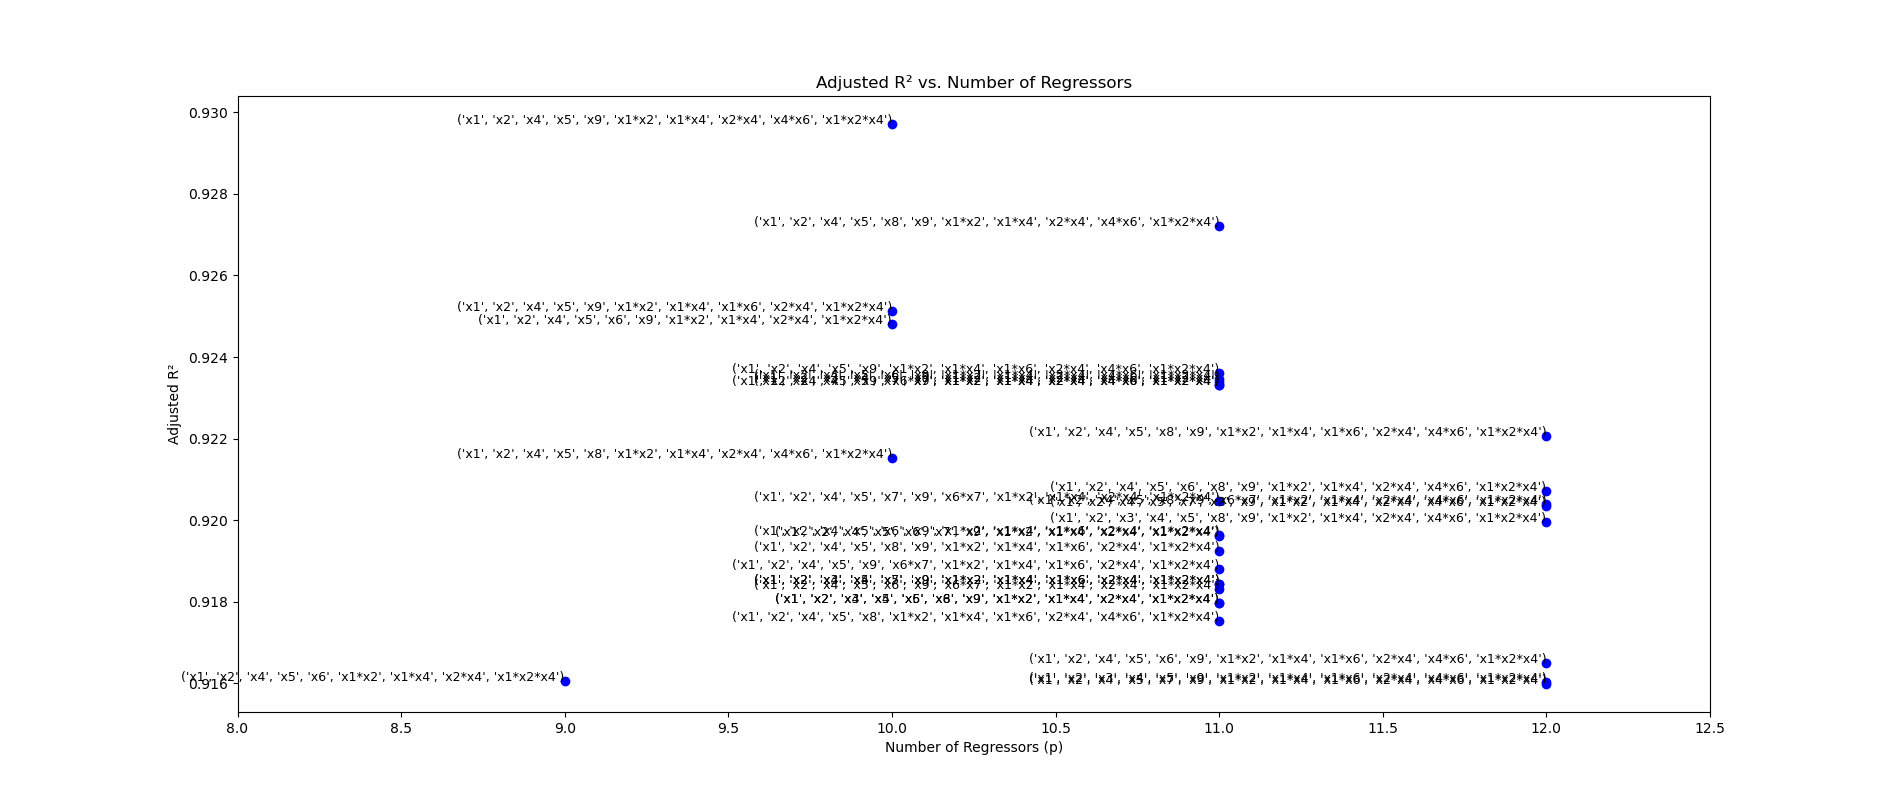

In [4]:
Image(filename='all_possible_regr.png', width=1200, height=1000)

Below are the top 10 models with the highest $R^2_{adj}$ scores and their summary statistics(code block 17). As a reminder, we want high values for $R^2_{adj}$ and low values for the rest of the statistics. We can see after comparing the combinations, the first row remains the best choice for our model.

| Predictors                                                                                                 | Adj R2  | MS Res  |   AIC   |   BIC   |  PRESS  |
|------------------------------------------------------------------------------------------------------------|---------|---------|---------|---------|---------|
| (x1, x2, x4, x5, x9, x1\*x2, x1\*x4, x2\*x4, x4\*x6, x1\*x2\*x4)                                           |  0.930  |  2.631  |  94.560 | 107.050 | 372.297 |
| (x1, x2, x4, x5, x8, x9, x1\*x2, x1\*x4, x2\*x4, x4\*x6, x1\*x2\*x4)                                       |  0.927  |  2.725  |  95.366 | 108.992 | 537.379 |
| (x1, x2, x4, x5, x9, x1\*x2, x1\*x4, x1\*x6, x2\*x4, x1\*x2\*x4)                                           |  0.925  |  2.803  |  96.011 | 108.501 | 465.099 |
| (x1, x2, x4, x5, x6, x9, x1\*x2, x1\*x4, x2\*x4, x1\*x2\*x4)                                               |  0.925  |  2.815  |  96.109 | 108.600 | 506.650 |
| (x1, x2, x4, x5, x9, x1\*x2, x1\*x4, x1\*x6, x2\*x4, x4\*x6, x1\*x2\*x4)                                   |  0.924  |  2.859  |  96.471 | 110.097 | 448.747 |
| (x1, x2, x4, x5, x6, x9, x1\*x2, x1\*x4, x2\*x4, x4\*x6, x1\*x2\*x4)                                       |  0.923  |  2.865  |  96.519 | 110.145 | 507.539 |
| (x1, x2, x3, x4, x5, x9, x1\*x2, x1\*x4, x2\*x4, x4\*x6, x1\*x2\*x4)                                       |  0.923  |  2.868  |  96.540 | 110.166 | 532.460 |
| (x1, x2, x4, x5, x7, x9, x1\*x2, x1\*x4, x2\*x4, x4\*x6, x1\*x2\*x4)                                       |  0.923  |  2.870  |  96.559 | 110.185 | 437.190 |
| (x1, x2, x4, x5, x9, x6\*x7, x1\*x2, x1\*x4, x2\*x4, x4\*x6, x1\*x2\*x4)                                   |  0.923  |  2.871  |  96.560 | 110.186 | 431.048 |
| (x1, x2, x4, x5, x8, x9, x1\*x2, x1\*x4, x1\*x6, x2\*x4, x4\*x6, x1\*x2\*x4)                               |  0.922  |  2.918  |  96.742 | 111.504 | 571.883 |


## Our Final Model & Model Validation 
From our analysis above our final model is as follows
$$y = \beta_0 + \beta_1x_1 + \beta_4x_4 + \beta_5x_5 + \beta_9x_9 + \beta_{12}x_1x_2 + \beta_{14}x_1x_4 + \beta_{24}x_2x_4 + \beta_{46}x_4x_6 + \beta_{124}x_1x_2x_4 + \epsilon$$

Examination of model terms:
- **x1:** Taxes are typically a significant factor influencing house prices. Higher taxes may mean a property is higher in valuation. The inclusion of taxes in the model reflects its importance in determining the sale price.
- **x2:** The total number of bathrooms in a house can be a proxy for the overall size, justifying its inclusion in the model.
- **x4:** Living space is a direct measure of the size of the home and is often one of the most significant factors influencing a house's price. Larger living spaces generally command higher prices, making this an essential variable in the model.
- **x5:** The number of garage stalls adds value to a property. Including this variable in the model helps account for the added value of parking space.
- **x9:** The total number of fireplaces in a house may increase the value of a home, and its inclusion may contribute to explaining the variation in house prices.
- **x1x2:** This interaction term suggests that the relationship between house prices may depend on the relationship between taxes and number of bathrooms.
- **x1x4:** This considers how taxes influence the price of homes with varying amounts of living space.
- **x2x4:** This term captures the combined effect of bathrooms and living space on the house price.
- **x4x6:** This term suggests that the value of garage stalls may vary depending on the size of the living space. 
- **x1x2x4:** This complex interaction examines how the combination of taxes, number of bathrooms, and living space influences the house price. It indicates that the relationship between these variables is not merely additive but might change depending on the levels of the other variables, capturing more nuanced market dynamics.

Variables Eliminated from the Model
- **x3:** Lot size has been eliminated from the final model. This might suggest that within the context of this dataset, the lot size does not provide additional predictive power beyond what is already captured by the other variables, possibly due to high correlation with other size-related variables like living space.
- **x6:** Although the number of rooms is typically important, it has been excluded as an individual variable. It might be that its effect is captured sufficiently through other variables (like living space) or through the interaction term $x_4x_6$.
- **x7:** While the number of bedrooms can add value, they might not be a primary driver of house prices in this dataset. Its exclusion indicates that it does not significantly contribute to explaining the variation in house prices or that its effect has been captured in other variables that could be its proxy.
- **x8:** Age is often a significant factor affecting house price due to depreciation. Its exclusion might suggest that age is not a strong predictor in this specific dataset.

__Summary__ : The final model focuses on key variables like taxes, living space, number of garage stalls, and number of rooms, all of which are crucial determinants of house prices. The inclusion of interaction terms helps to capture the complex relationships between these factors. The elimination of certain variables like lot size, number of bedrooms, and age suggests that these factors may not significantly influence house prices in this specific context, or their effects may be adequately captured by other included variables and interactions.

#### Observations from Statistical Analysis
After performing Ordinary Least squares regression technique and fitting our data to our model, we obtain the following results (code block 20):
- The test for significance of regression reveals a F-statistic of $F_0 = 30.10$ and corresponding p-value of $p = 5.84e^{-7}$. We can reject the null hypothesis and conclude that there is at least one linear relationship between the response and a regressor.
- Our adjusted coefficient of multiple determination is $R^2_{adj} = 0.93$ which indicates 93% of the variance in the response variable can be explained by the regressors in our model. This is a significant improvement from our original full model.
- Our AIC and BIC is significantly smaller than our original model's, which is an improvement as well.
- Lastly, our PRESS statistic is much less than our original model, signifying our regression model predicts new data better too.

Below is a table that summarizes the result of tests of significance on our individual regressors. All but one of our regressors have p-values well below the typical significance level of 0.05.



| Term           | Coef      | Std Err  | T-Statistic | P Value  | [0.025  | 0.975]  |
|----------------|-----------|----------|---------|------|---------|---------|
| $\beta_0$    | -728.2609 | 202.311  | -3.600  | 0.004| -1169.060| -287.462|
| $\beta_1$    | 85.1491   | 26.455   | 3.219   | 0.007| 27.508   | 142.790 |
| $\beta_2$    | 792.6797  | 200.043  | 3.963   | 0.002| 356.823  | 1228.536|
| $\beta_4$    | 432.8981  | 123.408  | 3.508   | 0.004| 164.015  | 701.781 |
| $\beta_5$    | 3.1678    | 0.790    | 4.008   | 0.002| 1.446    | 4.890   |
| $\beta_9$    | 1.6425    | 0.870    | 1.888   | 0.083| -0.253   | 3.538   |
| $\beta_{12}$ | -93.2828  | 25.791   | -3.617  | 0.004| -149.478 | -37.088 |
| $\beta_{14}$ | -44.5956  | 16.075   | -2.774  | 0.017| -79.621  | -9.571  |
| $\beta_{24}$ | -456.9820 | 120.783  | -3.783  | 0.003| -720.146 | -193.818|
| $\beta_{46}$ | -2.4831   | 0.599    | -4.145  | 0.001| -3.788   | -1.178  |
| $\beta_{124}$| 52.7767   | 15.519   | 3.401   | 0.005| 18.964   | 86.590  |



#### Residual Analysis of Our Improved Model 
We will perform regression analysis on the final model to validate the final model's assumptions and ensure that the selected variables meaningfully contribute to explaining the variation in the dependent variable. Below is our normal probability plot of our externally studentized residuals. 

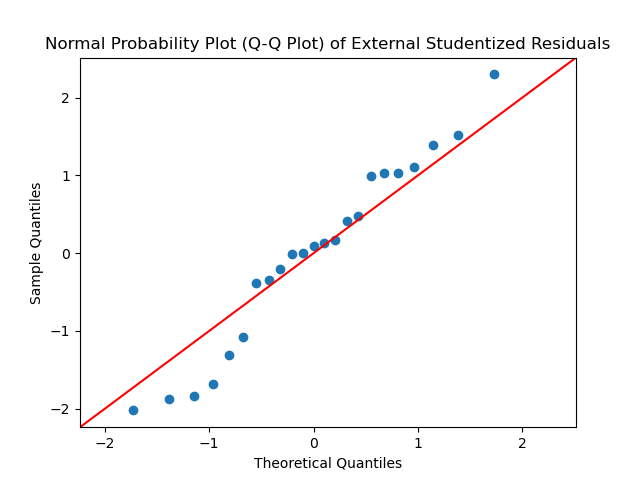

In [5]:
Image(filename='qqplot_final.png', width=500, height=500)

The deviations at both tails suggest that while the residuals are generally normally distributed in the central region, there are some deviations in the tails. This might not severely violate the assumption of normality, but it's something to be aware of. Below is our residuals vs. predicted values $\hat{y}_i$ graph.

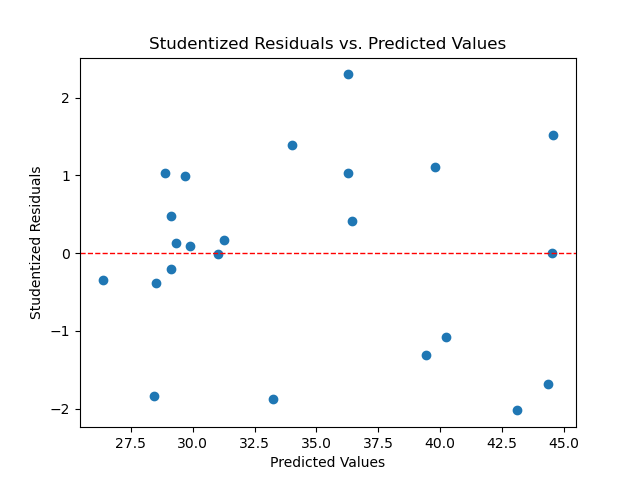

In [6]:
Image(filename='res_v_y_final.png', width=500, height=500)

The graph displays a random scatter around zero across all fitted values and no discernible pattern. This shows us that the model meets the requirements of constant variance and linearity.

#### Bootstrap Sampling 
Bootstrap sampling is a technique where random samples are drawn with replacement from a dataset to create multiple "bootstrap" samples. This method estimates the sampling distribution of a statistic and helps calculate measures like confidence intervals, without relying on assumptions about the data's distribution. Because our residual analysis above revealed a slight deviation from normality at the tail ends, we will employ bootstrap to estimate the coefficients of our model parameters more robustly and ensure reliable inference.

Here are the results from performing 1,000 bootstrap samples (code block 22):

| Coefficient    | Original Model | Bootstrap Mean | Bootstrap 95% CI (Lower) | Bootstrap 95% CI (Upper) |
|----------------|----------------|----------------|--------------------------|--------------------------|
| $\beta_0$      | -728.261        | -707.319       | -2271.527                 | 588.875                  |
| $\beta_1$      | 85.149          | 76.227         | -109.506                  | 271.483                  |
| $\beta_2$      | 792.680         | 788.718        | -476.294                  | 2345.420                 |
| $\beta_4$      | 432.898         | 408.677        | -317.505                  | 1340.743                 |
| $\beta_5$      | 3.168           | 3.145          | -0.159                    | 5.557                    |
| $\beta_9$      | 1.642           | 1.583          | -1.798                    | 4.577                    |
| $\beta_{12}$   | -93.283         | -87.713        | -279.604                  | 93.864                   |
| $\beta_{14}$   | -44.596         | -36.419        | -153.425                  | 73.308                   |
| $\beta_{24}$   | -456.982        | -449.701       | -1365.979                 | 263.669                  |
| $\beta_{46}$   | -2.483          | -2.463         | -4.753                    | -0.539                   |
| $\beta_{124}$  | 52.777          | 47.880         | -49.769                   | 161.613                  |

Comparing the bootstrap mean coefficients with the original model coefficients, we can see the bootstrap means are similar to the original coefficients, suggesting that our model's estimates are stable and robust.

#### K-Fold Cross Validation
Another technique used in model validation is K-fold cross-validation. It can assess how well a model will generalize to an independent dataset. We split the dataset into k subsets, or "folds," and using each fold as a test set while the remaining k-1 folds are used for training. This process is repeated k times, with each fold. We will use $R^2_{adj}$ as a performance metric and average it across all k trials to provide a more robust estimate of our model's adequacy. Below are the results of our k-fold cross validation (code block 27)


|         | Fold 1      | Fold 2      | Fold 3      | Fold 4      | Fold 5      | Mean   |
|-------------|--------|--------|--------|--------|--------|--------|
| $R^2 _{adj}$ | 0.930  | 0.986  | 0.988  | 0.973  | 0.588  | 0.893  |


The $R^2_{adj}$ values for folds 1 through 4 are all quite high, ranging from 0.930 to 0.988. This indicates that in these folds, the model explains between 93.0% and 98.8% of the variance in the dependent variable. However, fold 5 has a significantly lower R-squared value of 0.588. This could suggest that there may be some specific cases or subsets of data where the model does not perform as well.

Nevertheless, the mean R-squared score across all folds is 0.893, indicating that on average, the model explains approximately 89.3% of the variance in the dependent variable. This is a strong result, suggesting that the model has good overall predictive power across different subsets of the data

## Conclusion
In this project, we developed a regression model to predict the sale price of homes based on various features such as taxes, living space, and the number of garage stalls, among others. By carefully selecting the most relevant variables and interaction terms, we were able to capture the complex relationships between these factors and their influence on home prices.

The final model includes key predictors like taxes, living space, and the number of garage stalls, while also considering important interaction terms that highlight how these factors interact with each other to affect the overall price. Variables that were eliminated, such as the number of bedrooms and the age of the home, either did not contribute significantly to the model or were adequately represented by other variables.

Our model adequacy was validated through evaluating global model properties (F-statistic, p-value, etc.) and performing residual analysis. We also conducted cross-validation, confirming its robustness and generalizability. The high R-squared values across most folds suggest that the model is reliable and effective in predicting home prices. However, some variability in the results indicates that there may be specific conditions under which the model's performance could be improved further.

Overall, this regression analysis has provided valuable insights into the factors that most strongly influence home prices, offering a practical tool for predicting sale prices in the real estate market. 

__Future Recommendations:__

* While exploring all possible regressions, we found that considering every interaction variable was not feasible due to computational limitations. To conduct a more thorough analysis and enhance the model’s accuracy and robustness, we can incorporate additional variable selection techniques to identify the 'most optimal' subset of regressors.
* During the residual analysis of the final model, we observed a slight deviation from the normal distribution of the residuals. To address this, we applied bootstrap sampling when estimating our model parameters. Plus, we were satisfied with the $R^2_{adj}$ score of approximately 90%, which indicated a strong model fit. However, to further improve the model, additional analysis, transformations, and refinements could be explored.
* During the K-fold cross-validation, one fold exhibited significantly poor performance, with an R-squared of only 50%. To address this, we can closely examine the data used in that fold to identify potential anomalies or outliers or imbalance. Or we could explore ways to improve the model's generalization.
* Exploring non-linear modeling techniques and addressing potential outliers with regularization methods like Ridge or Lasso regression may also improve the model's generalizability and predictive power.
* Continuous data expansion and advanced validation techniques will also ensure that the model remains effective in a dynamic real estate environment.

## Works Cited 
* Montgomery, D. C., Peck, E. A., & Vining, G. G. (2021). Introduction to linear regression analysis. John Wiley & Sons.